# test-1

Original step-14

11 dic 2024

   cycle  cells  DoFs     ex POINT err               L2               H1  \
0      0     48    72 1.0173365408e-03 3.3549460989e-02 2.2582748759e-01   
1      1     45    67 9.6461797386e-04 1.6473577099e-02 1.0936361045e-01   
2      2     96   130 4.8542137706e-04 2.2247713490e-02 1.4614209516e-01   
3      3    243   307 2.5385861996e-04 2.6684577599e-02 1.7547517401e-01   
4      4    618   718 7.9840048551e-05 3.1824115913e-02 2.0487201983e-01   
5      5   1485  1665 3.9003807256e-05 3.3411763359e-02 2.1062151397e-01   
6      6   3573  3975 1.6281279746e-05 3.9788208929e-02 2.5035009860e-01   
7      7   8388  8934 6.6680900150e-06 3.7951344723e-02 2.3803639833e-01   

      std FLUX err          est err   Cons. FLUX err  
0 0.0000000000e+00 7.0238504569e-04 0.0000000000e+00  
1 0.0000000000e+00 8.8895251558e-04 0.0000000000e+00  
2 0.0000000000e+00 4.5460604483e-04 0.0000000000e+00  
3 0.0000000000e+00 2.4125357882e-04 0.0000000000e+00  
4 0.0000000000e+00 7.4912028166e-05 0.00

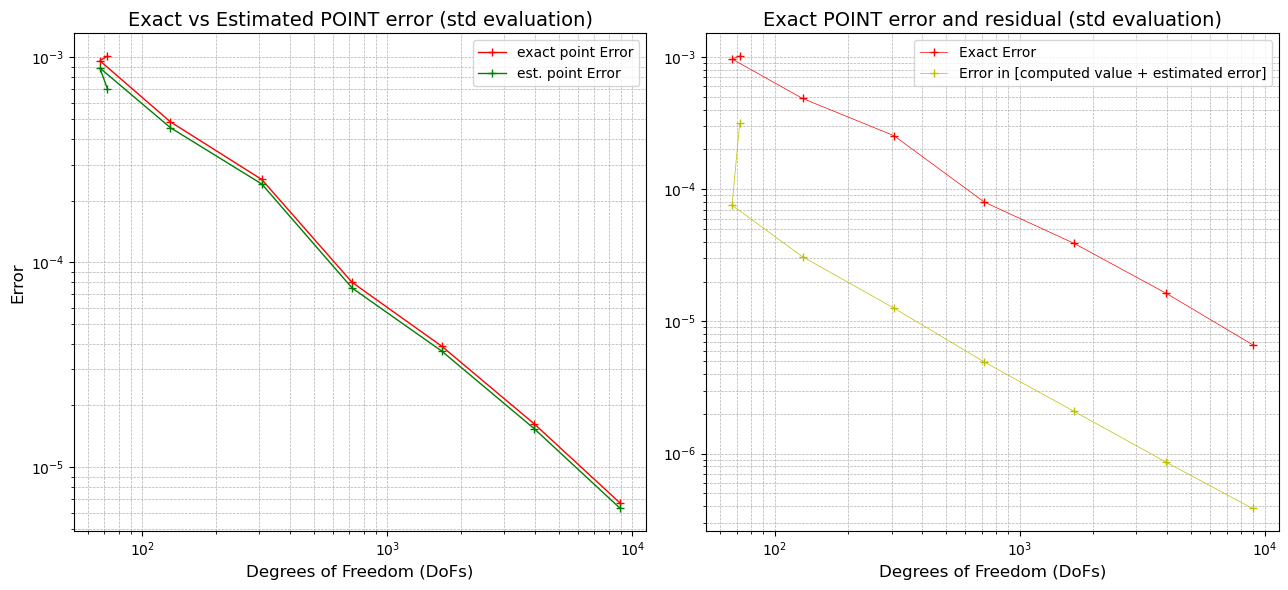

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

plt.subplot(1, 2, 1)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='exact point Error')
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. point Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated POINT error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)  # First subplot (top)
plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact POINT error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
